In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
from numpy import array 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA

from collections import Counter
from collections import defaultdict

from sklearn import tree
import scikitplot as skplt

from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets

import scikitplot as skplt
from sklearn.model_selection import cross_val_predict
from sklearn.manifold import TSNE

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from scikitplot.metrics import plot_precision_recall

### DF_TRAIN

In [2]:
df = pd.read_csv("df_RFE_train.csv")
df = df.drop(columns = ["Unnamed: 0"])
df.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.407747,0.376314,0.660790,-0.140840,0.892055,0.124660,0.977436,-0.123213,-0.970905,-0.745449,...,-0.983163,-0.991975,-0.999982,-1.0,-0.257549,-0.948870,-0.998285,-0.990697,0.179941,5
1,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.973770,-0.984923,-0.999987,-1.0,-0.048167,-0.975777,-0.999472,-0.996399,0.180289,5
2,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.963072,-0.985351,-0.999963,-1.0,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5
3,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.987275,-0.987874,-0.999978,-1.0,0.216862,-0.983524,-0.999770,-0.995237,0.181935,5
4,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.980848,-0.990373,-0.999988,-1.0,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5


### DF_TEST


In [3]:
df_test= pd.read_csv("df_RFE_test.csv")
df_test = df_test.drop(columns = ["Unnamed: 0"])
df_test.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.168084,0.076989,-0.709003,-0.282719,0.906083,0.152895,0.944461,-0.262160,-0.864621,-0.795468,...,-0.940137,-0.958325,-0.998040,-1.0,0.184035,-0.726707,-0.953984,-0.907308,0.276801,5
1,-0.302437,-0.104983,0.399177,-0.289215,0.856176,0.152895,0.944461,-0.262160,-0.858163,-0.745687,...,-0.974357,-0.987087,-0.999641,-1.0,0.018109,-0.960680,-0.998476,-0.938212,0.281343,5
2,-0.617916,0.305653,0.279786,-0.287513,0.856269,0.139454,0.948704,-0.261661,-0.859947,-0.231640,...,-0.983773,-0.975581,-0.999954,-1.0,-0.479145,-0.977176,-0.999570,-0.983273,0.280083,5
3,-0.749578,-0.063792,0.544916,-0.293396,0.856269,0.136124,0.947309,-0.272916,-0.853713,-0.233036,...,-0.987887,-0.979580,-0.999949,-1.0,-0.496954,-0.976796,-0.999504,-0.985843,0.284114,5
4,-0.590576,0.235151,0.457718,-0.302961,0.853942,0.133541,0.946221,-0.279190,-0.843378,-0.493331,...,-0.972039,-0.975105,-0.999955,-1.0,-0.427502,-0.975706,-0.999500,-0.990572,0.290722,5


In [4]:
attributes = [col for col in df.columns if col != 'label']

X_train = df[attributes].values
y_train = np.array(df['label'])
X_test = df_test[attributes].values
y_test = np.array(df_test['label'])

C:\Users\daddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

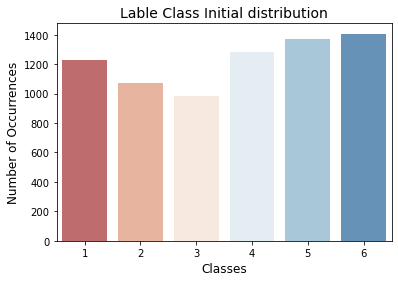

In [9]:
label = df.label.value_counts()
plt.figure()
sns.barplot(label.index, label.values, alpha=0.8, palette="RdBu")
plt.title('Lable Class Initial distribution',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

In [10]:
from imblearn.datasets import make_imbalance

In [11]:
rus = RandomUnderSampler(random_state=42, sampling_strategy={1: 80, 2: 90, 3: 100, 4: 150, 5: 1357, 6:1407} )
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({6: 1407, 5: 1357, 4: 150, 3: 100, 2: 90, 1: 80})


In [12]:

print(f'Distribution before imbalancing: {Counter(y_train)}')

X_res, y_res = make_imbalance(X_train, y_train,
                              sampling_strategy={1: 80, 2: 90, 3: 100, 4: 150, 5: 1357, 6:1407}
                              )
print(f'Distribution after imbalancing: {Counter(y_res)}')


Distribution before imbalancing: Counter({6: 1407, 5: 1374, 4: 1286, 1: 1226, 2: 1073, 3: 986})
Distribution after imbalancing: Counter({6: 1407, 5: 1357, 4: 150, 3: 100, 2: 90, 1: 80})


In [13]:
X_res.shape

(3184, 29)

C:\Users\daddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Classes')

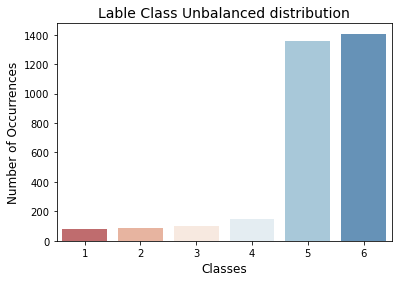

In [15]:
imbal_dict = {1: 80, 2: 90, 3: 100, 4: 150, 5: 1357, 6:1407}
imbal_dict_X = list(imbal_dict.keys())
imbal_dict_y = list(imbal_dict.values())

sns.barplot(imbal_dict_X , imbal_dict_y, alpha=0.8, palette="RdBu")
plt.title('Lable Class Unbalanced distribution',fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes', fontsize=12)

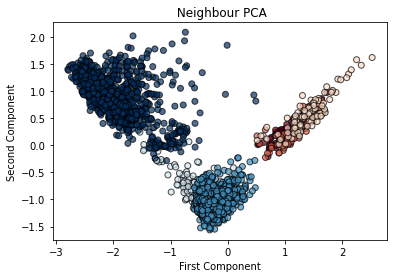

In [24]:
pca_unb = PCA(n_components=2)
pca_unb.fit(X_train)
X_pca_unb = pca_unb.transform(X_res)

plt.scatter(X_pca_unb[:, 0], X_pca_unb[:, 1], c=y_res, cmap="RdBu", edgecolor='k', alpha=0.7)
plt.title(" Neighbour PCA")
plt.ylabel("Second Component", fontsize=10)
plt.xlabel("First Component", fontsize=10)
plt.show()

# 

# Decision Tree Unbalanced  - TEST_SET 

In [52]:
dt_max_depth = [2,3,5,6,7,10,12, None]
dt_min_samples_split = randint(2, 51)
min_samples_leaf = randint(1, 51)
criterion = ["entropy", "gini"]
splitter = ["best", "random"]
max_features = [None, 2, 3, 4, 5]

dt_param_grid = {
    "max_depth": dt_max_depth,
    "min_samples_split": dt_min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "criterion": criterion,
    "splitter": splitter,
    "max_features": max_features
            }

dt_grid = RandomizedSearchCV(tree.DecisionTreeClassifier(), param_distributions=dt_param_grid,
                            scoring=make_scorer(accuracy_score))

In [53]:
dt_grid.fit(X_res, y_res)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 5, 6, 7, 10, 12,
                                                      None],
                                        'max_features': [None, 2, 3, 4, 5],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000151B7C36760>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000151B7C36550>,
                                        'splitter': ['best', 'random']},
                   scoring=make_scorer(accuracy_score))

In [54]:
print(dt_grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 26, 'min_samples_split': 28, 'splitter': 'best'}


In [55]:
decision_tree = tree.DecisionTreeClassifier(**dt_grid.best_params_).fit(X_res,y_res)

y_pred = decision_tree.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8031896844248388
F1-score [0.8115016  0.72810219 0.79455782 0.64900662 0.79227799 1.        ]
              precision    recall  f1-score   support

           1       0.86      0.77      0.81       496
           2       0.64      0.85      0.73       471
           3       0.93      0.70      0.79       420
           4       0.93      0.50      0.65       491
           5       0.67      0.96      0.79       532
           6       1.00      1.00      1.00       537

    accuracy                           0.80      2947
   macro avg       0.84      0.80      0.80      2947
weighted avg       0.84      0.80      0.80      2947



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

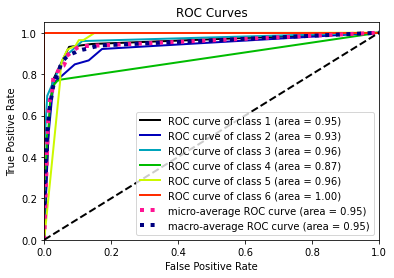

In [56]:
y_decision_tree = decision_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_decision_tree)

# 

# KNN Unbalanced - TEST_SET

In [190]:
k_range = range(1,11)
knn_metrics = ['euclidean', 'manhattan']

knn_param_grid = {
    'n_neighbors': k_range,
    'metric': knn_metrics
            }

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring='accuracy')
knn_grid.fit(X_res, y_res)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 11)},
             scoring='accuracy')

In [191]:
print('Accuracy: ' + str(knn_grid.best_score_))
print('Parameters: ' + str(knn_grid.best_params_))

Accuracy: 0.9567129629629629
Parameters: {'metric': 'manhattan', 'n_neighbors': 7}


In [192]:
knn = KNeighborsClassifier(**knn_grid.best_params_).fit(X_res,y_res)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.87      0.95      0.91       496
           2       0.86      0.83      0.84       471
           3       0.92      0.87      0.89       420
           4       0.90      0.79      0.84       491
           5       0.82      0.92      0.87       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



## CondensedNearestNeighbour

In [82]:
cnn = CondensedNearestNeighbour( n_jobs=-1, n_neighbors= 30)
X_res_cnn, y_res_cnn = cnn.fit_resample(X_res,y_res)
print('Resampled dataset shape %s' % Counter(y_res_cnn))

Resampled dataset shape Counter({1: 80, 3: 41, 5: 38, 2: 36, 6: 31, 4: 25})


In [86]:
X_res_cnn.shape

(251, 29)

In [70]:
clf_cnn = DecisionTreeClassifier(**dt_grid.best_params_)
clf_cnn.fit(X_res_cnn, y_res_cnn)

y_pred_cnn = clf_cnn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_cnn))
print('F1-score %s' % f1_score(y_test, y_pred_cnn, average=None))
print(classification_report(y_test, y_pred_cnn))

Accuracy 0.7326094333220224
F1-score [0.6205036  0.40575916 0.64587973 0.79484425 0.82869955 1.        ]
              precision    recall  f1-score   support

           1       0.56      0.70      0.62       496
           2       0.53      0.33      0.41       471
           3       0.61      0.69      0.65       420
           4       0.84      0.75      0.79       491
           5       0.79      0.87      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.73      2947
   macro avg       0.72      0.72      0.72      2947
weighted avg       0.73      0.73      0.73      2947



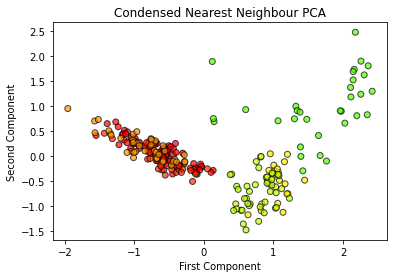

In [71]:
pca = PCA(n_components=2)
pca.fit(X_res_cnn)
X_pca = pca.transform(X_res_cnn)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res_cnn, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("Condensed Nearest Neighbour PCA")
plt.ylabel("Second Component", fontsize=10)
plt.xlabel("First Component", fontsize=10)
plt.show()

## SMOTE

In [72]:
sm = SMOTE(random_state = 42)
X_res_smote, y_res_smote = sm.fit_resample(X_res, y_res)
print('Resampled dataset shape %s' % Counter(y_res_smote))

Resampled dataset shape Counter({1: 1407, 2: 1407, 3: 1407, 4: 1407, 5: 1407, 6: 1407})


In [73]:
X_res_smote.shape

(8442, 29)

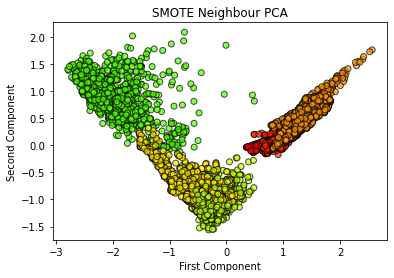

In [74]:
pca_smote = PCA(n_components=2)
pca.fit(X_train)
X_pca_smote = pca.transform(X_res_smote)

plt.scatter(X_pca_smote[:, 0], X_pca_smote[:, 1], c=y_res_smote, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("SMOTE Neighbour PCA")
plt.ylabel("Second Component", fontsize=10)
plt.xlabel("First Component", fontsize=10)
plt.show()

In [75]:
clf_smote = DecisionTreeClassifier(**dt_grid.best_params_)
clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_smote))
print('F1-score %s' % f1_score(y_test, y_pred_smote, average=None))
print(classification_report(y_test, y_pred_smote))

Accuracy 0.8659653885307091
F1-score [0.85494717 0.8111588  0.86323714 0.80916031 0.84201236 1.        ]
              precision    recall  f1-score   support

           1       0.82      0.90      0.85       496
           2       0.82      0.80      0.81       471
           3       0.91      0.82      0.86       420
           4       0.87      0.76      0.81       491
           5       0.79      0.90      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.86      0.86      2947
weighted avg       0.87      0.87      0.87      2947



In [79]:
y_predx= clf_smote.predict_proba(X_test)

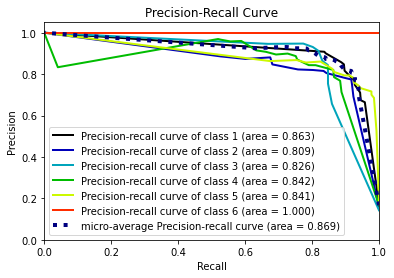

In [81]:
plot_precision_recall(y_test, y_predx)
plt.show()

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

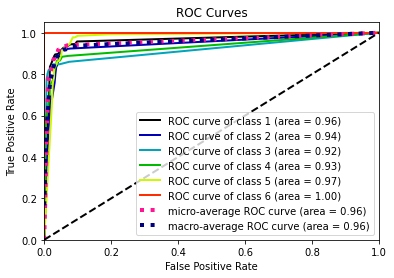

In [87]:
y_decision_tree_smote = clf_smote.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_decision_tree_smote)

## Class Weight 

In [450]:
clf_weight = DecisionTreeClassifier(min_samples_leaf=10, 
                             class_weight={1:10, 2: 10, 3:5, 4:10, 5:1, 6:1}, random_state=42)
clf_weight.fit(X_res, y_res)

y_pred_weight = clf_weight.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred_weight))
print('F1-score %s' % f1_score(y_test, y_pred_weight, average=None))
print(classification_report(y_test, y_pred_weight))

Accuracy 0.8571428571428571
F1-score [0.81216069 0.8401487  0.83140283 0.79823594 0.83933275 1.        ]
              precision    recall  f1-score   support

           1       0.88      0.75      0.81       496
           2       0.75      0.96      0.84       471
           3       0.90      0.77      0.83       420
           4       0.87      0.74      0.80       491
           5       0.79      0.90      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.85      0.85      2947
weighted avg       0.87      0.86      0.86      2947



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

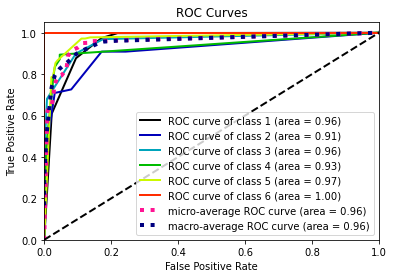

In [405]:
y_decision_tree_weight = clf_weight.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_decision_tree)